In [1]:
%matplotlib inline
import pandas as pd
import sys
sys.path.append('/home/suraj/Repositories/Hacker Earth Challenge/hackerearthchallenge')
from functions import read_file, remove_redundant_fields, \
    transform_columns, convert_states
import pickle
import matplotlib.pyplot as plt
import numpy

Data Collection

In [2]:
dataframe = read_file('/home/suraj/Repositories/Hacker Earth Challenge/hackerearthchallenge/train_indessa.csv')

In [3]:
dataframe.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,...,0.0,NaN,INDIVIDUAL,NaN,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0.0,NaN,INDIVIDUAL,NaN,117th week,0.0,1023.0,13272.0,55500.0,1
7,23043116,6000,6000,6000.0,36 months,NaN,9.17,B,B1,Banker,...,0.0,54.0,INDIVIDUAL,NaN,78th week,0.0,0.0,272579.0,11800.0,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,...,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,281521.0,62100.0,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,52th week,0.0,0.0,76034.0,33200.0,0


Preprocessing the Dataset

In [4]:
print "Features in the dataset\n"
for item in list(dataframe.columns):
    print item
print "The total number of features is {0}".format(len(list(dataframe.columns)))

Features in the dataset

member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
batch_enrolled
int_rate
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
pymnt_plan
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
collections_12_mths_ex_med
mths_since_last_major_derog
application_type
verification_status_joint
last_week_pay
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim
loan_status
The total number of features is 45


Numerical Mappings for non-numeric features

In [5]:
dataframe['addr_state'] = [convert_states(state) for state in dataframe['addr_state'] ]
dataframe['addr_state'] = pd.to_numeric(dataframe['addr_state'], errors = 'coerce')
dataframe_expt = transform_columns(dataframe)

In [6]:
dataframe_expt['term'] = pd.to_numeric(dataframe_expt['term'].replace(to_replace="months", value='', regex = True))

In [7]:
dataframe_expt['emp_length'] = dataframe_expt['emp_length'].replace(to_replace = ['years','year','<'], value='',  regex= True)
dataframe_expt['emp_length'] = dataframe_expt['emp_length'].replace('10+ ', '10')
dataframe_expt['emp_length'] = pd.to_numeric(dataframe_expt['emp_length'], errors='coerce')

In [8]:
dataframe_expt['last_week_pay'] = pd.to_numeric(dataframe_expt['last_week_pay'].replace(to_replace = 'th week',
                                                                                        value = '', regex = True), errors='coerce')

In [8]:
y = dataframe_expt['loan_status']
del dataframe_expt['loan_status']

0         0
1         0
2         0
3         0
4         0
5         0
6         1
7         0
8         0
9         0
10        0
11        1
12        0
13        0
14        1
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        1
24        0
25        0
26        1
27        1
28        0
29        0
         ..
532398    0
532399    1
532400    0
532401    0
532402    0
532403    0
532404    0
532405    1
532406    0
532407    0
532408    0
532409    0
532410    1
532411    1
532412    0
532413    0
532414    0
532415    1
532416    0
532417    0
532418    0
532419    0
532420    1
532421    0
532422    1
532423    0
532424    0
532425    1
532426    0
532427    0
Name: loan_status, dtype: int64


In [10]:
dataframe_expt = dataframe_expt.fillna(value=dataframe_expt.median())

Remove Redundant Features

In [11]:
dataframe_expt = remove_redundant_fields(dataframe_expt, 'batch_enrolled', 'grade', 'emp_title', 'desc', 'title', 'zip_code')

Field does not exist or is already deleted batch_enrolled
Field does not exist or is already deleted grade
Field does not exist or is already deleted emp_title
Field does not exist or is already deleted desc
Field does not exist or is already deleted title
Field does not exist or is already deleted zip_code


In [12]:
dataframe_expt = remove_redundant_fields(dataframe_expt, 'member_id', 'verification_status_joint')

Field does not exist or is already deleted member_id
Field does not exist or is already deleted verification_status_joint


In [13]:
dataframe_expt = (dataframe_expt - dataframe_expt.mean() )/ (dataframe_expt.max() - dataframe_expt.min())

In [14]:
dataframe_expt.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,...,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05,5.324280e+05
mean,-1.688852e-17,8.661119e-18,1.259913e-15,1.194841e-16,-1.803434e-12,2.167949e-17,3.407063e-17,1.042604e-17,1.563687e-17,1.470655e-17,...,4.278846e-18,-2.624026e-18,1.941328e-19,6.245614e-18,1.067626e-19,1.003902e-17,-1.107245e-19,2.648214e-20,-2.176957e-19,-4.201694e-20
std,2.444759e-01,2.443229e-01,2.411797e-01,4.581814e-01,1.850279e-01,1.908799e-01,3.829079e-01,1.326083e-01,6.863990e-03,4.176309e-01,...,1.222089e-02,9.014803e-03,8.312090e-03,6.163334e-02,2.392740e-02,1.443953e-01,5.651116e-03,3.786580e-03,1.857098e-02,3.659098e-03
min,-4.132636e-01,-4.128774e-01,-4.201408e-01,-2.998246e-01,-3.347262e-01,-3.221984e-01,-5.654872e-01,-2.802779e-01,-7.772538e-03,-4.783558e-01,...,-1.363886e-03,-6.939573e-04,-8.935480e-04,-2.446130e-01,-5.728474e-04,-1.904547e-01,-3.581973e-04,-3.960809e-04,-1.686341e-02,-3.141942e-03
25%,-1.958723e-01,-1.954861e-01,-1.915693e-01,-2.998246e-01,-1.374300e-01,-1.457278e-01,-3.432650e-01,-8.027790e-02,-3.161430e-03,-4.783558e-01,...,-1.363886e-03,-6.939573e-04,-8.935480e-04,-1.685361e-04,-5.728474e-04,-1.180862e-01,-3.581973e-04,-3.960809e-04,-1.283620e-02,-1.671942e-03
50%,-5.094480e-02,-5.055859e-02,-4.871219e-02,-2.998246e-01,-1.068732e-02,-2.808074e-02,-9.931651e-03,-8.027790e-02,-1.055900e-03,2.164424e-02,...,-1.363886e-03,-6.939573e-04,-8.935480e-04,-1.685361e-04,-5.728474e-04,-3.255993e-02,-3.581973e-04,-3.960809e-04,-6.779824e-03,-7.719418e-04
75%,1.519537e-01,1.523400e-01,1.512878e-01,7.001754e-01,1.249274e-01,1.189781e-01,4.345128e-01,1.197221e-01,1.576011e-03,5.216442e-01,...,-1.363886e-03,-6.939573e-04,-8.935480e-04,-1.685361e-04,-5.728474e-04,8.257165e-02,-3.581973e-04,-3.960809e-04,7.641754e-03,6.480583e-04
max,5.867364e-01,5.871226e-01,5.798592e-01,7.001754e-01,6.652738e-01,6.778016e-01,4.345128e-01,7.197221e-01,9.922275e-01,5.216442e-01,...,9.986361e-01,9.993060e-01,9.991065e-01,7.553870e-01,9.994272e-01,8.095453e-01,9.996418e-01,9.996039e-01,9.831366e-01,9.968581e-01


In [15]:
dataframe_expt.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.011814,-0.011428,-0.010141,-0.299825,0.251248,0.324860,0.323402,-0.280278,-0.004877,-0.478356,...,-0.001364,-0.000694,-0.000894,0.166498,-0.000573,-0.104928,-0.000358,-0.000396,-0.013276,-0.000062
1,-0.288626,-0.288240,-0.282998,-0.299825,-0.095182,-0.086904,-0.565487,0.119722,-0.001056,-0.478356,...,-0.001364,-0.000694,-0.000894,-0.000169,-0.000573,-0.160849,-0.000358,-0.000396,-0.015617,0.000148
2,-0.137901,-0.137515,-0.134426,-0.299825,-0.252766,-0.233963,-0.454376,-0.280278,-0.003161,0.021644,...,-0.001364,-0.000694,-0.000894,-0.000169,-0.000573,-0.160849,-0.000358,-0.000265,-0.012077,0.000348
3,0.007026,0.007412,0.008431,-0.299825,0.273639,0.236625,0.434513,-0.080278,0.003155,0.021644,...,-0.001364,-0.000694,-0.000894,-0.000169,-0.000573,0.253624,-0.000358,-0.000396,-0.009918,-0.000672
4,0.036012,0.036398,0.037002,-0.299825,-0.109969,-0.145728,0.434513,-0.080278,-0.002424,0.521644,...,-0.001364,-0.000694,-0.000894,-0.000169,-0.000573,0.125335,-0.000358,-0.000396,-0.010969,0.001561
5,0.007026,0.007412,0.007002,-0.299825,-0.183480,-0.204551,-0.454376,0.119722,0.004734,0.021644,...,-0.001364,-0.000694,-0.000894,-0.000169,-0.000573,0.181256,-0.000358,-0.000396,0.026964,-0.000192
6,-0.282829,-0.282443,-0.277998,-0.299825,-0.225727,-0.233963,-0.121043,-0.080278,-0.000003,-0.478356,...,-0.001364,-0.000694,-0.000894,-0.000169,-0.000573,0.194414,-0.000358,0.001664,-0.015204,0.002408
7,-0.253843,-0.253457,-0.248712,-0.299825,-0.172073,-0.175140,0.212291,0.119722,-0.002214,0.021644,...,-0.001364,-0.000694,-0.000894,0.055387,-0.000573,0.066124,-0.000358,-0.000396,0.017209,-0.001962
8,-0.253843,-0.253457,-0.248712,-0.299825,0.031560,0.060155,0.101179,0.119722,0.001787,0.021644,...,-0.001364,-0.000694,-0.000894,-0.000169,-0.000573,-0.045718,-0.000358,-0.000396,0.018326,0.003068
9,0.573693,0.574079,0.567002,0.700175,0.164640,0.207213,-0.454376,0.119722,-0.000319,0.521644,...,-0.001364,-0.000694,-0.000894,-0.000169,-0.000573,-0.019402,-0.000358,-0.000396,-0.007359,0.000178


Correlation of Features

In [16]:
def plot_dataframe(dataframe):
    correlations = dataframe_expt.corr()
    names = dataframe_expt.columns
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = numpy.arange(0,len(names),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

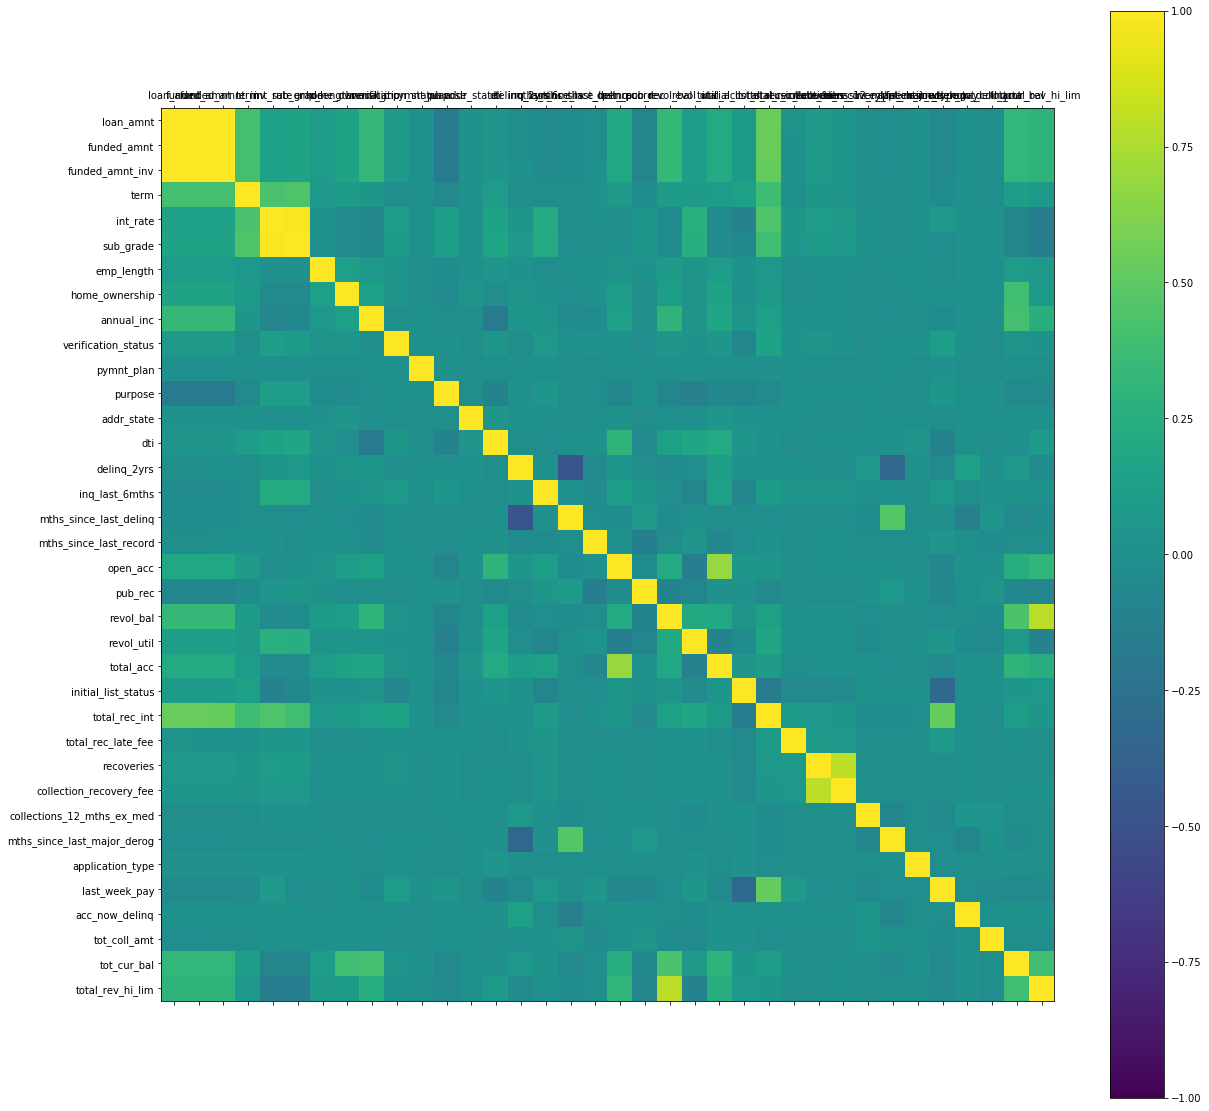

In [17]:
plot_dataframe(dataframe_expt)

In [18]:
dataframe_expt['invested_percent'] = dataframe_expt['funded_amnt_inv'] / dataframe_expt['funded_amnt']
dataframe_expt['funded_percent'] = dataframe_expt['funded_amnt'] / dataframe_expt['loan_amnt']
dataframe_expt['loan_amnt_percent'] = dataframe_expt['loan_amnt'] / dataframe_expt['annual_inc']
dataframe_expt['interest_recovered'] = dataframe_expt['total_rec_int']/ ( dataframe_expt['int_rate'] * dataframe_expt['loan_amnt'])
dataframe_expt['open_acc_percent'] = dataframe_expt['open_acc']/ dataframe_expt['total_acc']
dataframe_expt['late_fee_recovered'] = dataframe_expt['total_rec_late_fee']/ ( dataframe_expt['int_rate'] * dataframe_expt['loan_amnt'])
dataframe_expt['amnt_owed_percent'] = dataframe_expt['tot_coll_amt'] / dataframe_expt['tot_cur_bal']

In [19]:
dataframe_expt = remove_redundant_fields(dataframe_expt, 'funded_amnt', 'funded_amnt_inv')

Field does not exist or is already deleted funded_amnt
Field does not exist or is already deleted funded_amnt_inv


In [20]:
dataframe_expt = remove_redundant_fields(dataframe_expt, 'sub_grade')

Field does not exist or is already deleted sub_grade


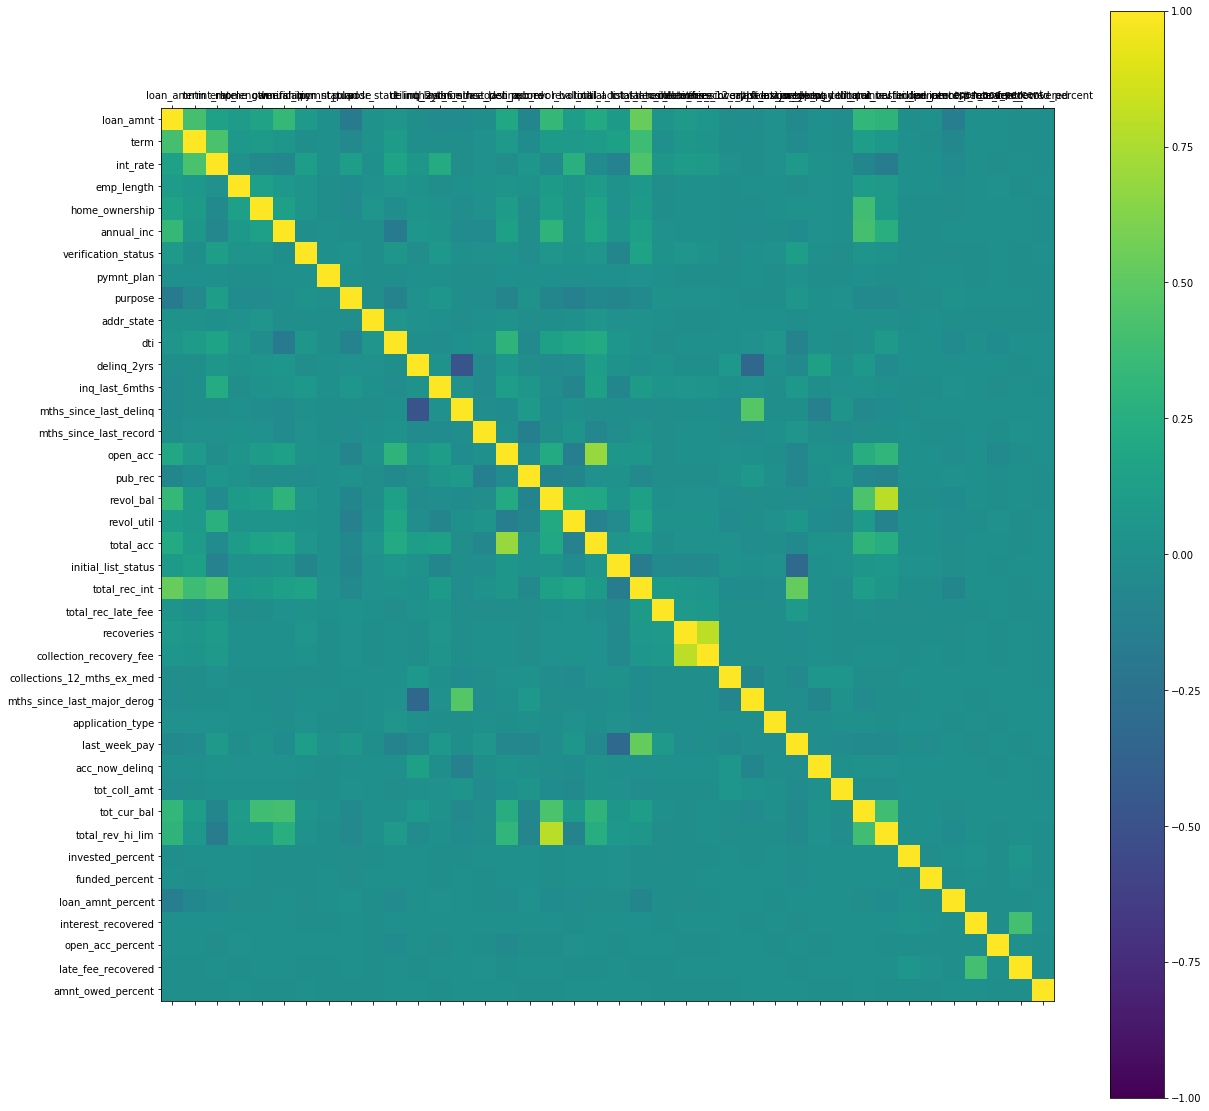

In [21]:
plot_dataframe(dataframe_expt)

In [27]:
print len(dataframe_expt.columns)

40


In [22]:
x = dataframe_expt.as_matrix()
y = y.as_matrix()

In [29]:
# Save Cleaned Dataset
with open('datasets/x_dataset.pkl', 'wb') as trainset:
    pickle.dump(x, trainset)
with open('datasets/y_dataset.pkl', 'wb') as trainset:
    pickle.dump(y, trainset)